<a href="https://colab.research.google.com/github/rubanzasilva/bearClassifierInference/blob/main/fastai_lesson_2_bearsInference_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#hide
! [ -e /content ] 
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *

!pip install gradio==3.0
from fastai.vision.all import *
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.5 MB/s eta 0:

In [2]:
get_image_files

<function fastai.data.transforms.get_image_files(path, recurse=True, folders=None)>

In [3]:
!ls

gdrive	sample_data


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls drive/MyDrive/Rubanza/datasets/bears/

grizzlyA.jpg


In [ ]:
# urls = search_images_ddg('grizzly bear', max_images=1)
# urls[0]

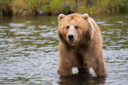

In [18]:
im = Image.open('drive/MyDrive/Rubanza/datasets/bears/grizzlyA.jpg')
#im.to_thumb(128,128)
im.thumbnail((128,128))
im

In [8]:
#im = PILImage.create('/kaggle/input/teddybears/teddyBear.jpg')
#im.thumbnail((128,128))
#im

In [9]:
!ls drive/MyDrive/Rubanza/models/bearClassifier

bearClassifier.pkl  bearClassifier.pkl.zip


In [10]:
learn = load_learner('drive/MyDrive/Rubanza/models/bearClassifier/bearClassifier.pkl')

In [11]:
learn.predict(im)

('grizzly', TensorBase(1), TensorBase([1.4251e-08, 1.0000e+00, 4.9933e-08]))

In [12]:
#export
categories = ('grizzly', 'black', 'teddy')

In [13]:
def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

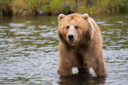

In [19]:
im

In [20]:
classify_image(im)

{'grizzly': 8.495644578943029e-07,
 'black': 0.999996542930603,
 'teddy': 2.5666495275800116e-06}